In [232]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('.\cropped_image_2\shrimp_crop_21.jpg')

This archive shows how the length calculation algorithm works

In [233]:
img.shape

(46, 78, 3)

In [234]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

# Remove interference

cv_contours = []
 
for contour in contours:
    area = cv2.contourArea(contour)
    if area >= 300:
        cv_contours.append(contour)

cnt = cv_contours[0]


In [235]:
rect = cv2.minAreaRect(cnt)

# cv2.boxPoints(rect) for OpenCV 3.x
box = cv2.boxPoints(rect) 
box = np.int0(box)
(tl,tr,br,bl) = box 

img1 = cv2.drawContours(img,[box],0,(0,0,255),2)

In [236]:
box 

array([[-3, 30],
       [68, -8],
       [76,  6],
       [ 4, 44]], dtype=int64)

In [237]:
def midpoint(ptA,ptB):
    return ((ptA[0] + ptB[0]) * 0.5 , (ptA[1] + ptB[1]) * 0.5)


m1 = (x1,y1) = midpoint(tl,tr)
m2 = (x2,y2) = midpoint(tl,bl)
m3 = (x3,y3) = midpoint(bl,br)
m4 = (x4,y4) = midpoint(tr,br)    

md = [(int(x1),int(y1)),(int(x2),int(y2)),(int(x3),int(y3)),(int(x4),int(y4))]

print(md)

[(32, 11), (0, 37), (40, 25), (72, -1)]


In [238]:
dA = dist.euclidean(m1,m3)
print(dA)
dB = dist.euclidean(m2,m4)
print(dB)

15.88238017426859
80.97067370350824


In [239]:
if dA > dB:
    pix_L = dA
    pix_W = dB
else:
    pix_L = dB
    pix_W = dA

In [240]:
real_len = 25
pix_num = 108

pix_thresh = real_len/pix_num

lenth = pix_L*pix_thresh
width = pix_W*pix_thresh

In [241]:
print("Lenth(mm):",lenth)
print("Width(mm):",width)

Lenth(mm): 18.74321150544172
Width(mm): 3.676476892191803


In [242]:
cv2.line(img1,(md[0]),(md[2]),(0,255,0),2)
cv2.line(img1,(md[1]),(md[3]),(0,255,0),2)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

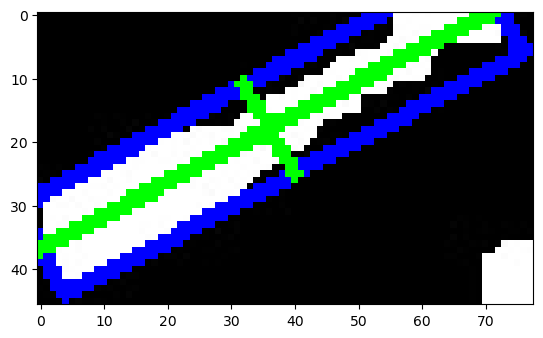

In [243]:
plt.imshow(img1,cmap='gray')
plt.show()

Part.II https://blog.csdn.net/Mikumiku339/article/details/114798190